#### Antoine Habis

# Mini-Project: Gaussian Mixtures

## 1.  Preliminaries

## Question 1

In [1]:
source("functions.r")
library(MASS)
library(abind)
library(mnormt)
library(LaplacesDemon)
library(coda)


n = 500
mu1 = c(0,0)
mu2 = c(1,0)
mu3 = c(0,1)

Mu = matrix( 
  c(mu1, mu2 ,mu3), 
    nrow=3,              
    ncol=2,               
    byrow = TRUE)       
p = c(4/10, 3/10, 3/10)
sigma = rWishart(3, 4, 0.02*diag(2))
X1 = c()
X2 = c()
X3 = c()

X = matrix(data = rep(0, 3*n), nrow = n, ncol = 3)
for (i in (1:n)){
    k = rmultinom(1,1, p)
    Y = rbind(mvrnorm(1, mu1, sigma[,,1]),mvrnorm(1, mu2, sigma[,,2]),mvrnorm(1, mu3, sigma[,,3]))
    X[i,(1:2)] = Y[which(k == 1),]
    X[i,3] = which(k == 1)
    }

## Question 2

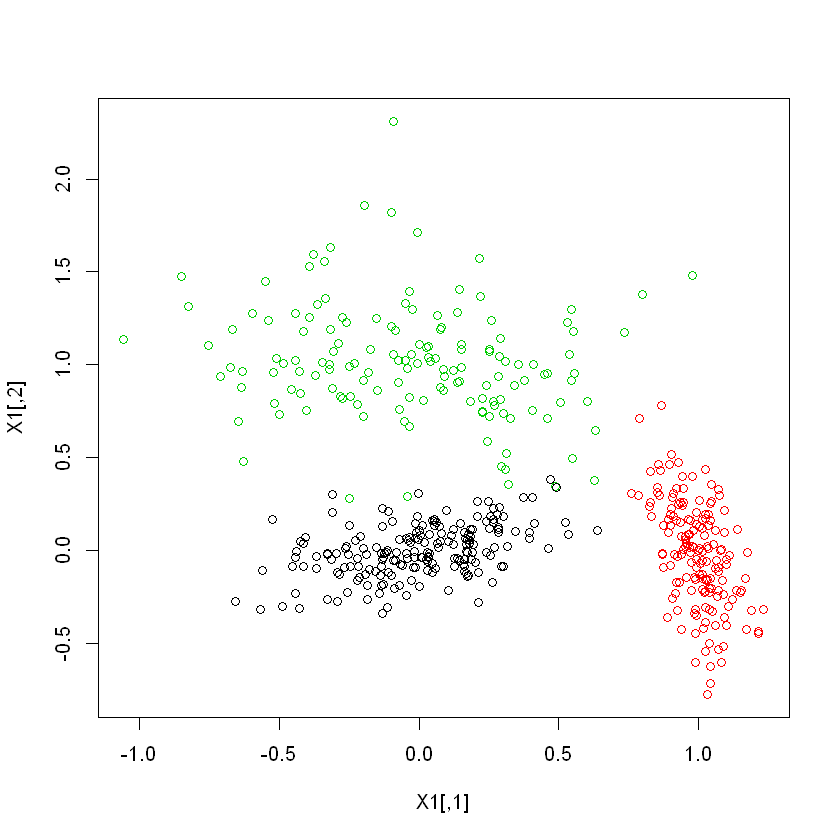

In [2]:
X1 = X[,(1:2)]
labs = X[,3]
plot(X1,col = labs)

The points generated from the different gaussian are well seperated to each other since: 

- the 3 variance matrices don't have too high coefficients,
- the means of the 3 gaussians are also well separated in $\mathbb{R}^{2}$ 


So we expect that the GMM model will work well since the data is gaussian and quite well separated.

##  2 Variational Bayes

### Question 1: 

See functions.R

### Question 2:

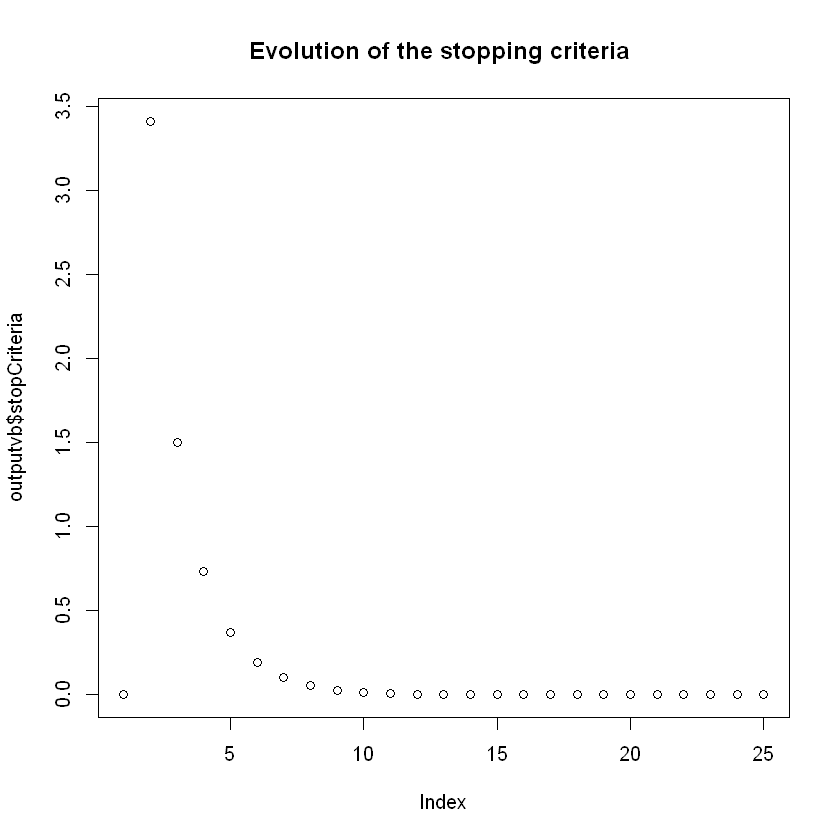

In [3]:
#########################'
#' 2. VB
#########################' 
#' Bayesian model: 
#' p ~ dirichlet(alpha);  alpha = (alpha0, ... , alpha0)
#' [ xi | p ] ~ Multinomial(p)
#' [ mu_j | Lambda_j ] ~ Normal(m0, beta0 Lambda_j^(-1))
#' Lambda_j ~ Wishart(W0, nu0)
#' [ X| xi=j, mu, Lambda ] ~ Normal (mu_j, Lambda_j^(-1))

m0 <- rep(0,2)
beta0 <- 0.1
W0 <- 1*diag(2)
nu0 <- 10
seed <- 10
set.seed(seed)
test_GMM(0.01)

### Question 3:

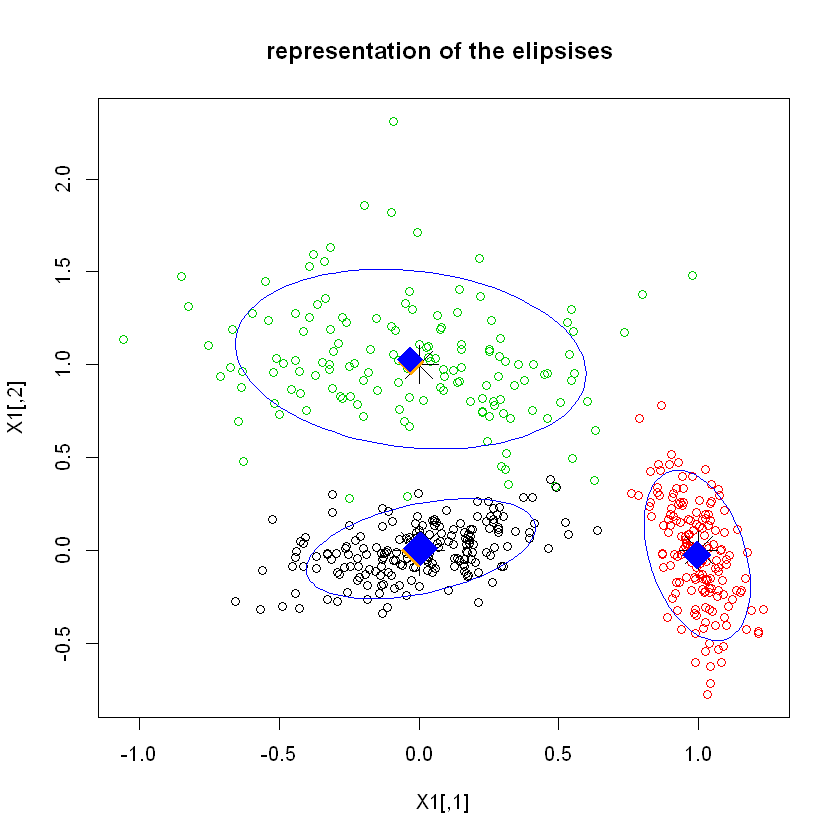

In [4]:
outputvb_main = test_GMM(1, ret = 'True', summ = 'False')
visual_summary(outputvb_main,cent='representation of the elipsises', param = '' )

### Question 4:

We are going to compare the results with $K_{fit}$ being greater than what it should be in order to see the influence of $\alpha_0$ on the weights ot the mixture components.

Let say $K_{fit} = 5$

First of all let's visualize the evolution of the stopping criteria and the ellipsis with different value of $\alpha_0$

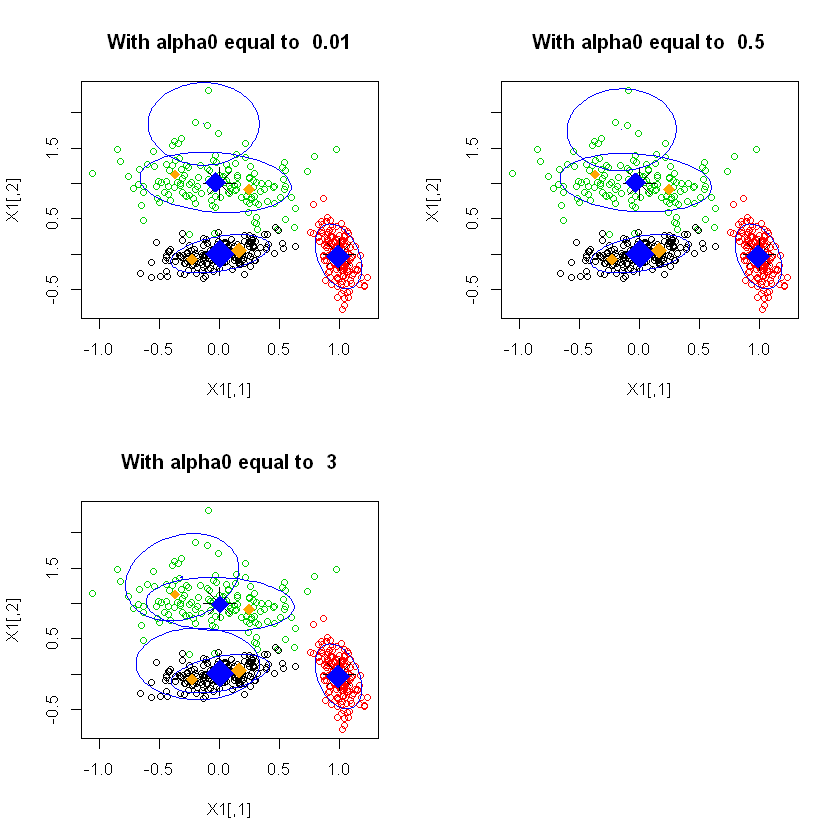

In [5]:
list_alpha0= c(0.01,0.5, 3)
par(mfrow = c(2,2))
for (i in (1:length(list_alpha0))){
outputvb = test_GMM(alpha0 = list_alpha0[i],Kfit = 5, ret = 'True', summ = 'False')
visual_summary(outputvb, Kfit = 5,cent = 'With alpha0 equal to ', param = list_alpha0[i])
}



Now let's compare the different weights when $\alpha_0$ changes:

In [6]:

for (i in (1:length(list_alpha0))){
print(paste('With aplha_0 equal to ', list_alpha0[i],"we get the following weights"))
u = test_GMM(alpha0 = list_alpha0[i], Kfit = 5, ret = 'True', summ = 'False')
alpha = u$alphamat[,ncol(u$alphamat)]
p_vb = sapply((1:length(alpha)),function(i){alpha[i]/sum(alpha)})
print(p_vb)
writeLines("\n")
}

[1] "With aplha_0 equal to  0.01 we get the following weights"
[1] 0.000019998 0.390809096 0.322403569 0.006763172 0.280004165


[1] "With aplha_0 equal to  0.5 we get the following weights"
[1] 0.3218276797 0.0009950334 0.3903297361 0.2761299511 0.0107175997


[1] "With aplha_0 equal to  3 we get the following weights"
[1] 0.378940113 0.318695163 0.286736058 0.009803280 0.005825387




We can see here that:
- when $\alpha_0$ is very small $\approx 0.01$ the weights of the two gaussians we added to the model are very small $\approx 1e-3$.
- When $ \alpha_0 \approx 0.5$ the two weights are less small but still very small compared to the 3 other ones(the true ones) $\approx 1e-2$.

- When $\alpha_0 \approx 1 $  the two weights get bigger $1e-1$.


We can deduce that when $\alpha_0$ is very small we recover the true number of components.


**To conclude, the algorithm is slower but we have the true components!**

### Question 5

Let's see the influence of the other hyperparameters: 
- $\nu_0$
- $W_0$
- $\beta_0$
- $m_0$

- # $\nu_0$

First let's analyze the evolution of the graph and ellipsis obtained when we change $\nu_0$

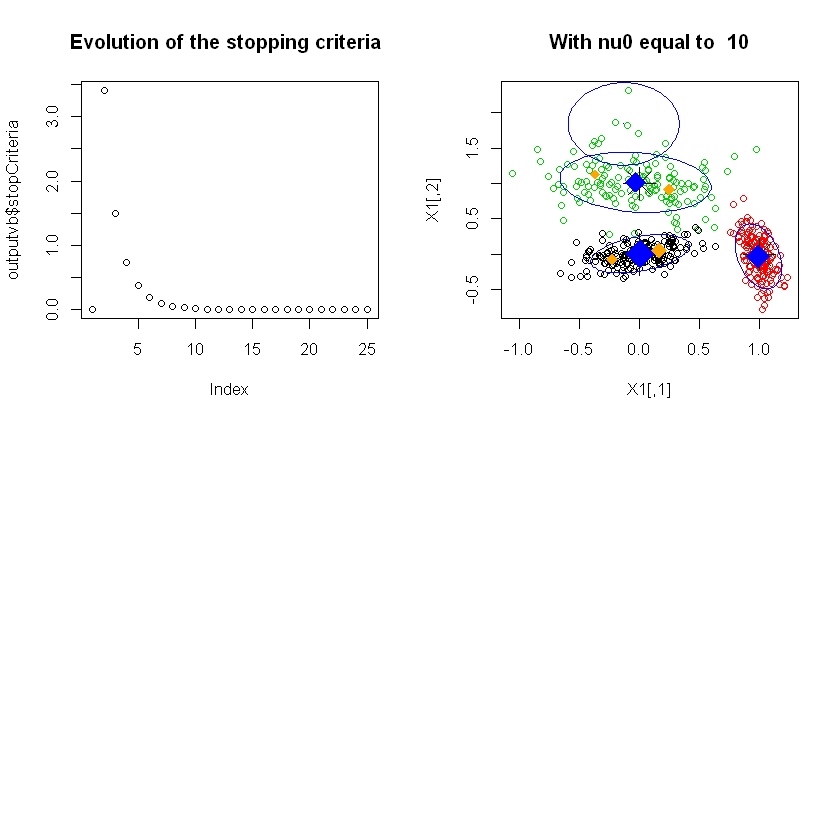

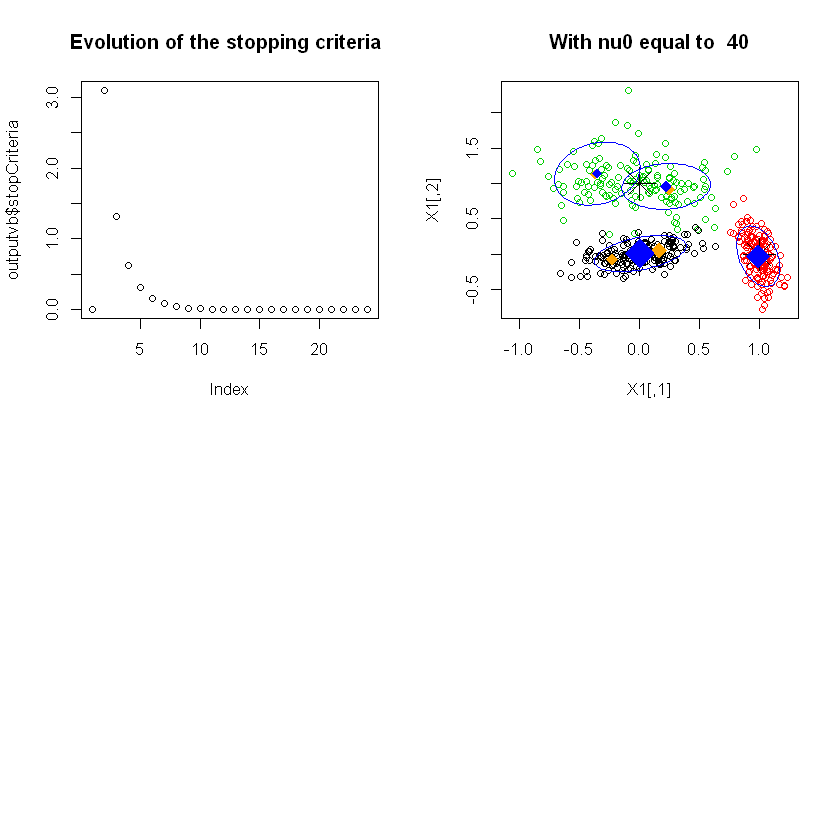

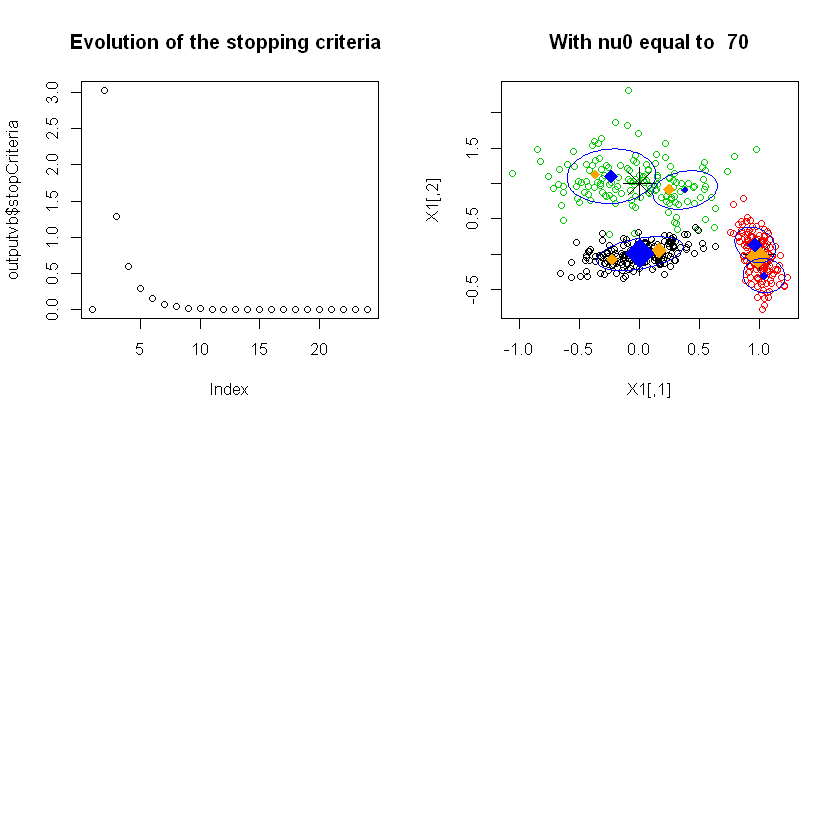

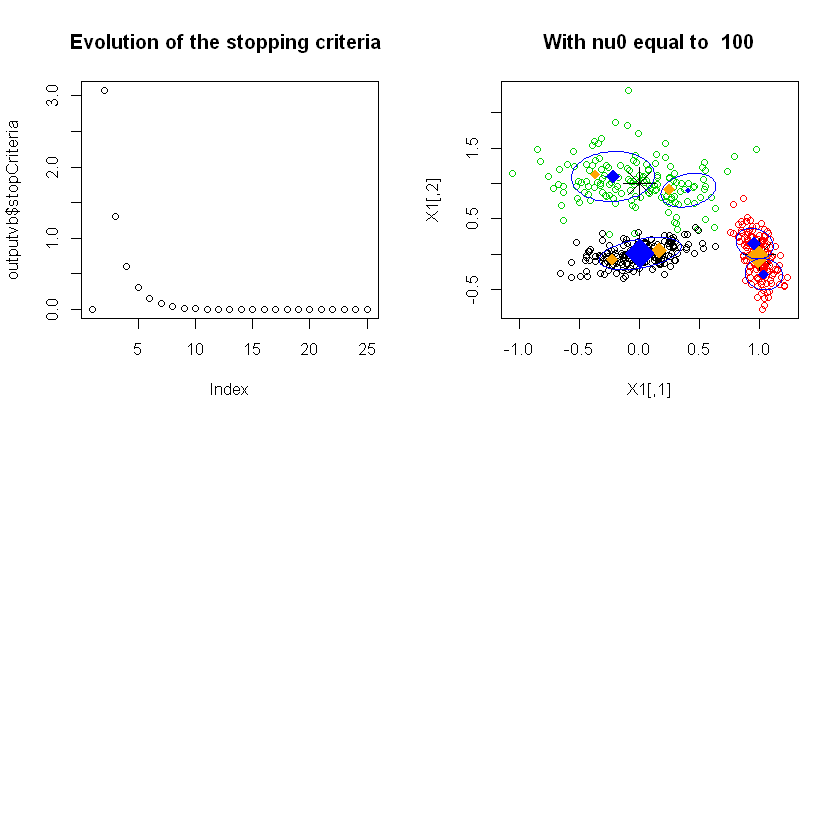

In [7]:
list_nu0 = seq(10,100,30)
for (i in (1:length(list_nu0))){
par(mfrow = c(2,2))
test_GMM(nu0 = list_nu0[i], ret = 'False', summ = 'True')
outputvb = test_GMM(nu0 = list_nu0[i],Kfit = 5, ret = 'True', summ = 'False')
visual_summary(outputvb, Kfit = 5,cent = 'With nu0 equal to ', param = list_nu0[i])
}


First of all:
- with a value of $\nu_0 \approx 10$, we see the contours of the true gaussians, the other one being so thin we can't notice its contours and the last one is bit away from the data.  It basically means that the algorithm got rid of them . However, when $\nu_0$ increases, the width of all the elipses get to be the same.


Secondly, 
- We can see that the contours of the different ellipsises are retracting when $\nu_0$ is getting bigger meaning that the variances obtained in the covariance matrixes are getting smaller.

- $\nu_0$ is the parameter corresponding to the degrees of freedom. The higher $\nu_0$ is, the more importance we give to the prior on $\Sigma$. It has an impact on the variances of the gaussians as we can see.

Let's now compare the true weights  with the weights obtained with different values of $\nu_0$


In [8]:
for (i in (1:length(list_nu0))){
print(paste('With nu_0 equal to ', list_nu0[i],"we get the following weights"))
u = test_GMM(nu0 = list_nu0[i], Kfit = 5, ret = 'True', summ = 'False')
alpha = u$alphamat[,ncol(u$alphamat)]
p_vb = sapply((1:length(alpha)),function(i){alpha[i]/sum(alpha)})
print(p_vb)
writeLines("\n")
}

[1] "With nu_0 equal to  10 we get the following weights"
[1] 0.000019998 0.390809096 0.322403569 0.006763172 0.280004165


[1] "With nu_0 equal to  40 we get the following weights"
[1] 0.32364855 0.02165986 0.37753232 0.14961379 0.12754548


[1] "With nu_0 equal to  70 we get the following weights"
[1] 0.2604484 0.1868521 0.2928702 0.1244012 0.1354281


[1] "With nu_0 equal to  100 we get the following weights"
[1] 0.1360004 0.2957441 0.2461253 0.1425198 0.1796104




- For a value of $\nu_0 \approx 10$ the weight are really close to the true weights : $p = (\frac{4}{10},\frac{3}{10},\frac{3}{10})$ so the 2 last weights are crushed to zero.


- When $\nu_0$ is increasing the weights become more and more homogeneous. We don't recover the true components.



The initial value of $\nu_0$ has a big impact on the weights so we should not give a value which is too high. 

- ## $W_0$

Let's first observe the evolution of the graphs when $W_0$ changes

\begin{aligned}
W_0 = 
\begin{pmatrix}
w&0\\
0&w\\
\end{pmatrix}
\end{aligned}

Here we are going to change the velue of $w$

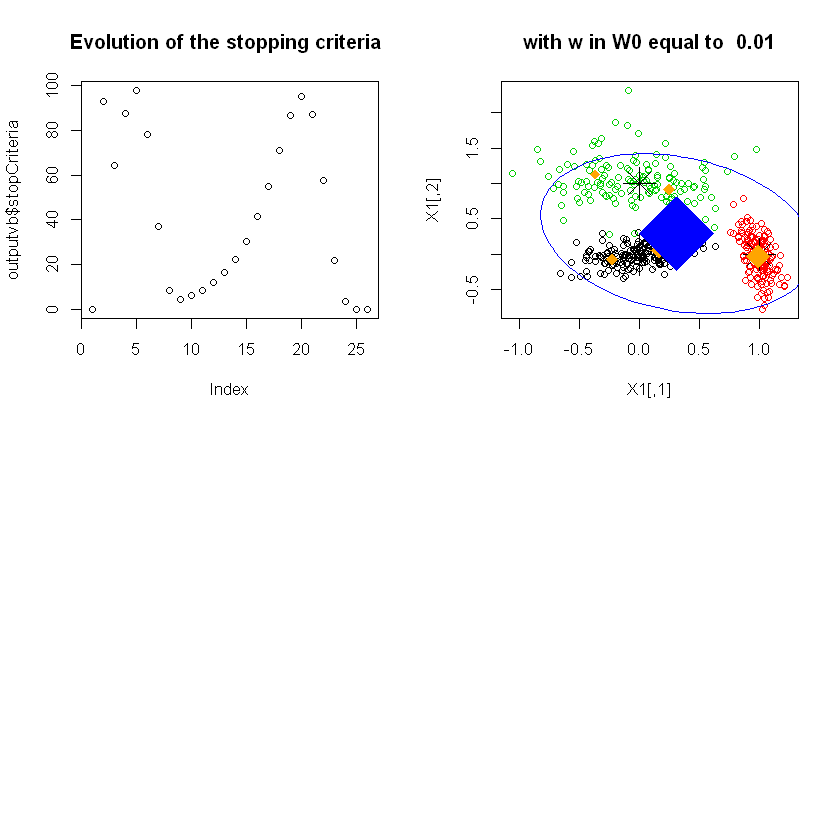

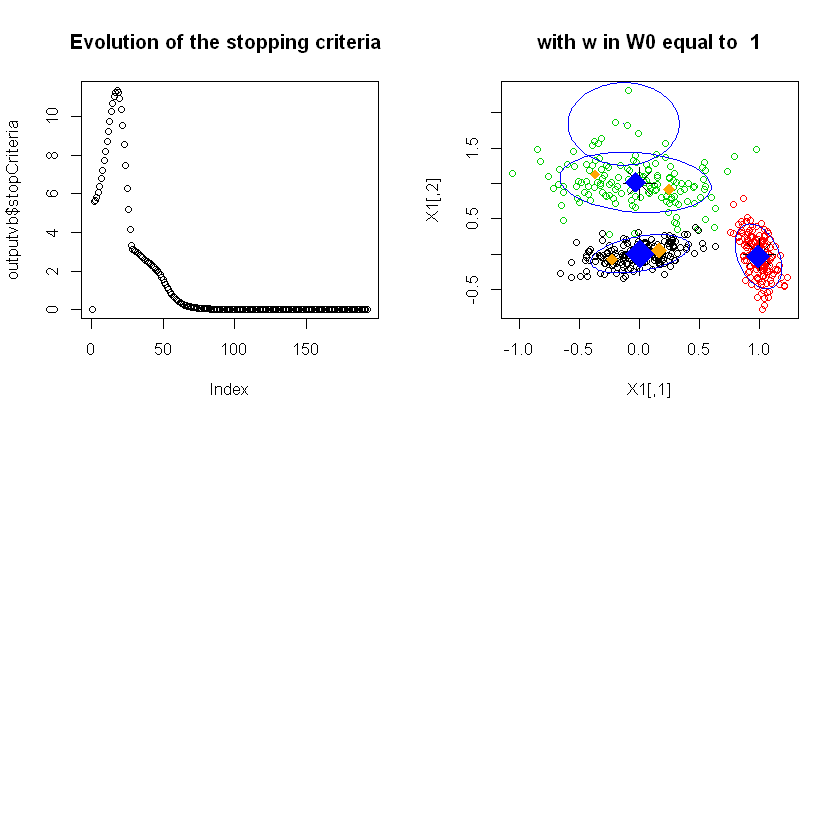

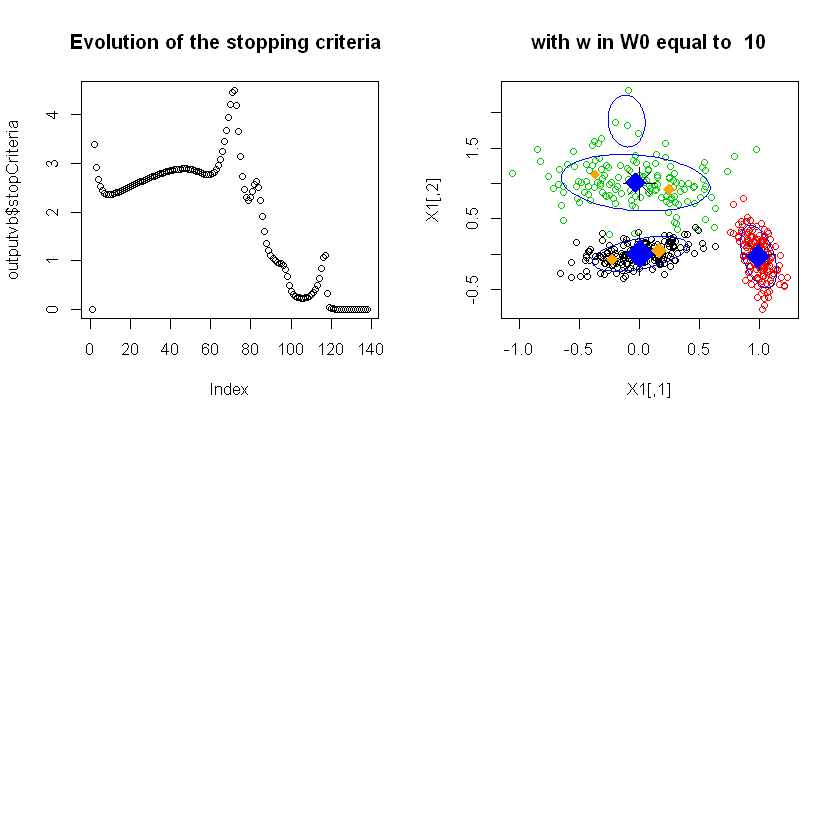

In [9]:
I = c(0.01,1,10)
for (i in (I)){
par(mfrow = c(2,2))
W0_temp = i*diag(2)
test_GMM(W0 = W0_temp, Kfit = 5, ret = 'False', summ = 'True')
outputvb = test_GMM(W0 = W0_temp,Kfit = 5, ret = 'True', summ = 'False')
visual_summary(outputvb, Kfit = 5, cent = "with w in W0 equal to ", param = i)
}




- When $w$ is very small, $\approx 0.01$ we can only see the contour of one ellipse that englobe all the data. The other one being too thin.


- When $w \approx 1$ we get the true number of elipses in the graph except one a bit away from the data.


- When $w \approx 10$ we can see all the 5 ellipses we can also see that the algorithm doesn't converge as the stopping criteria doees not converge towards $0$


Let's now compare the true weights  with the weights obtained with different values of $W_0$

In [10]:
for (i in I){
W0_temp = i*diag(2)
print(paste('With w equal to ', i,"we get the following weights"))
u = test_GMM(W0 = W0_temp, Kfit = 5, ret = 'True', summ = 'False')
alpha = u$alphamat[,ncol(u$alphamat)]
p_vb = sapply((1:length(alpha)),function(i){alpha[i]/sum(alpha)})
print(p_vb)
writeLines("\n")
}

[1] "With w equal to  0.01 we get the following weights"
[1] 1.9998e-05 1.9998e-05 9.9992e-01 1.9998e-05 1.9998e-05


[1] "With w equal to  1 we get the following weights"
[1] 0.322403569 0.000019998 0.390809096 0.280004165 0.006763172


[1] "With w equal to  10 we get the following weights"
[1] 0.385577224 0.320887075 0.293495705 0.000019998 0.000019998




- When $w$ is small , as expected when we saw the graph earlier, only one weight prevail from te other ones, we get only one gaussian that englobe the whole dataset


- When $w$ is equal to 1, we are really close to the true weights, we have the 3 true gaussians and an other elipse away from the data.


- When $w$ is $\approx 10$ the weights are close to the previous ones


To conclude, $w$ has a big impact on the weights also, if w is too small then we will cluster the data in only one cluster we are doing under fitting 

- ##  $\beta_0$

#### $\beta_0$ is the scale parameter in the wishart distribution


Let's  see the influences of $\beta_0$ in the graphs:

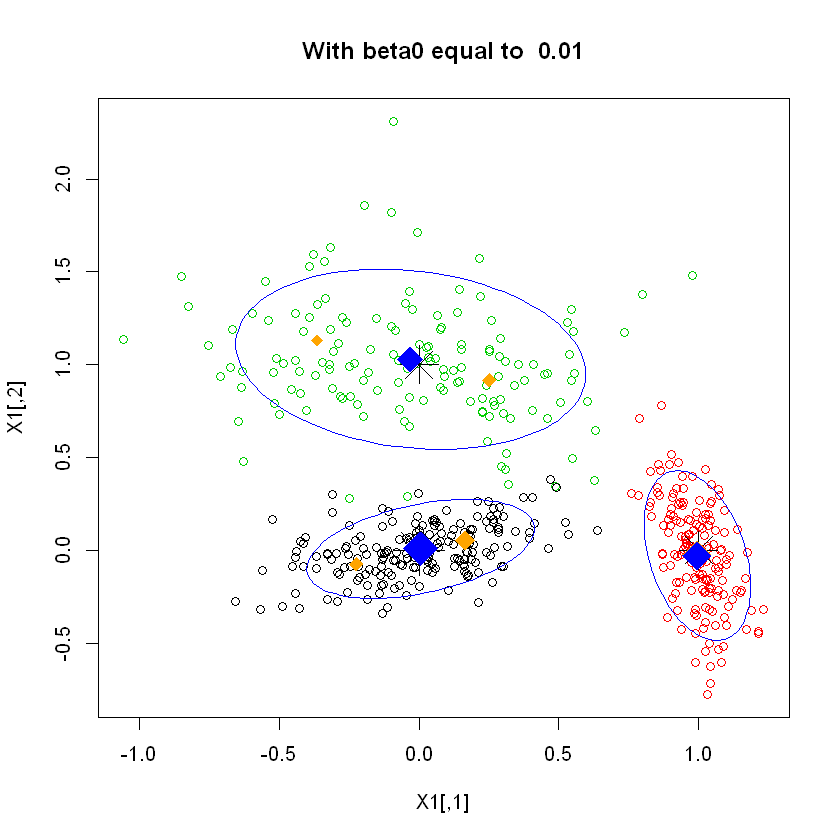

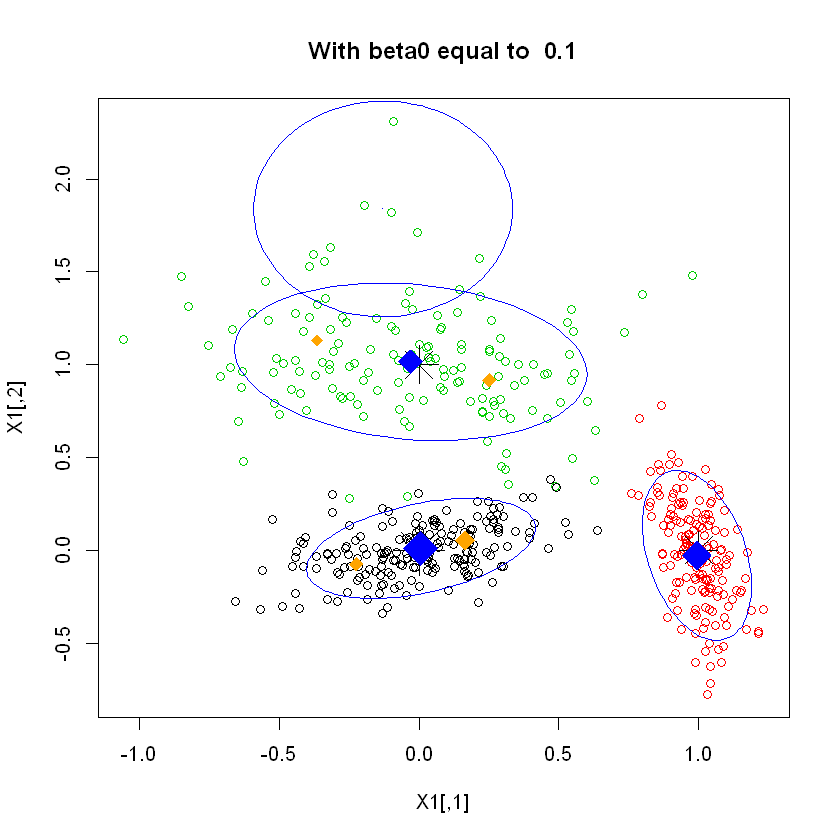

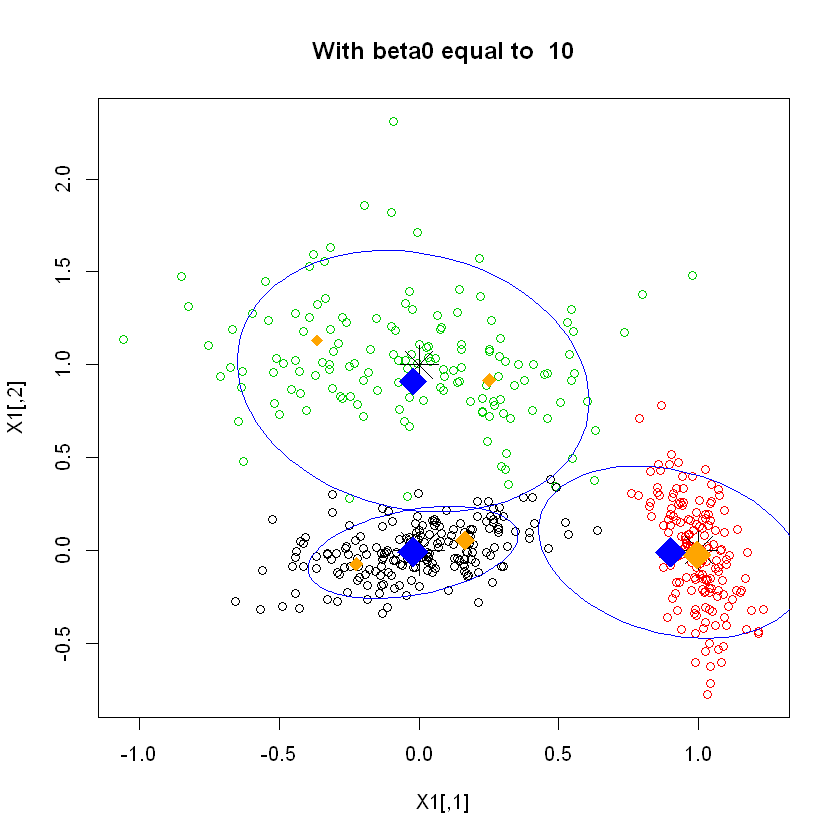

In [11]:
list_beta0 = c(0.01,0.1,10)
for (i in (1:length(list_beta0))){
outputvb = test_GMM(beta0 = list_beta0[i],Kfit = 5, ret = 'True', summ = 'False')
visual_summary(outputvb, Kfit = 5,cent = 'With beta0 equal to ', param = list_beta0[i])
}


We can see that when $\beta_0$ is too high the ellipses deviate, they are not oriented towards the right side anymore.

**A too high value of $\beta_0$ makes the ellipses loose their right main orientation.**

Let's now compare the weights

In [12]:
for (i in (1:length(list_beta0))){
print(paste('With beta_0 equal to ', list_beta0[i],"we get the following weights"))
u = test_GMM(beta0 = list_beta0[i], Kfit = 5, ret = 'True', summ = 'False')
alpha = u$alphamat[,ncol(u$alphamat)]
p_vb = sapply((1:length(alpha)),function(i){alpha[i]/sum(alpha)})
print(p_vb)
writeLines("\n")
}

[1] "With beta_0 equal to  0.01 we get the following weights"
[1] 0.000019998 0.390176616 0.322176040 0.002473849 0.285153498


[1] "With beta_0 equal to  0.1 we get the following weights"
[1] 0.322403569 0.000019998 0.390809096 0.280004165 0.006763172


[1] "With beta_0 equal to  10 we get the following weights"
[1] 0.345506945 0.345094786 0.309358274 0.000019998 0.000019998




Reminder the true weights are : $p = (\frac{4}{10},\frac{3}{10},\frac{3}{10})$

- for a very low value of $\beta_0$ the weights of the 2 gaussians added in the model have completely been crushed to zero with weights $\approx 1e-2$ and $\approx 1e-4$ and the weights are really close to the true weights


- for a value of $\beta_0 = 0.1$, it's basically the same, the weights of the added gaussians are still crushed to zero $\approx 1e-3$) but a bit less and the weights are still very close to the real ones.


- for $\beta_0 = 10$ we observe basically the same thing but the weights are less close to the true ones.

- #  $m_0$

#### $m_0$ is the initial mean of the gaussians
Let's  see the influences of $m_0$ in the graphs:

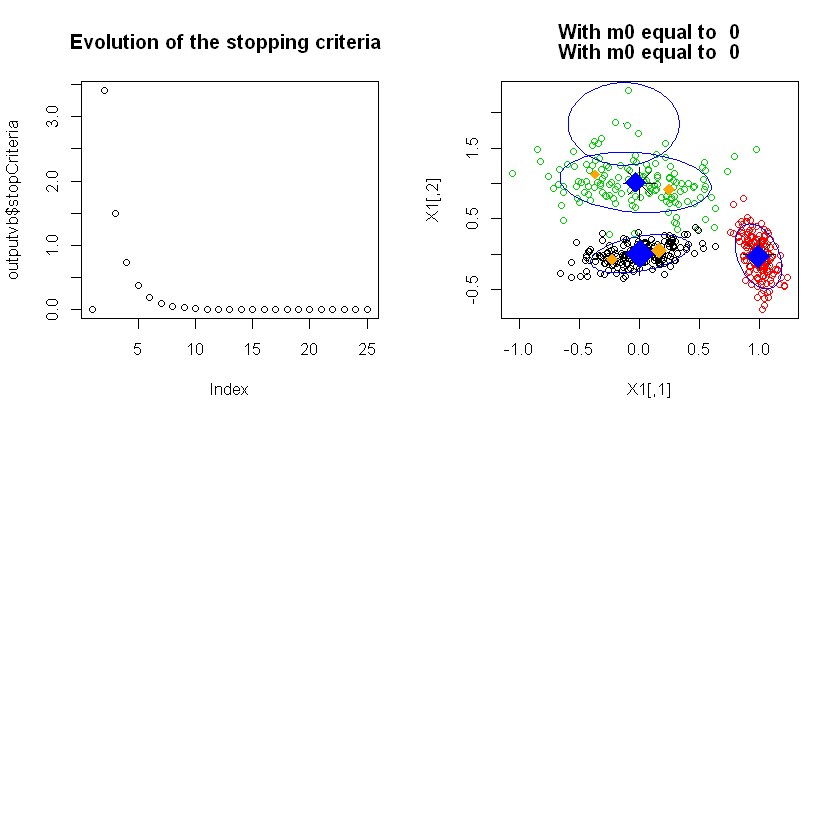

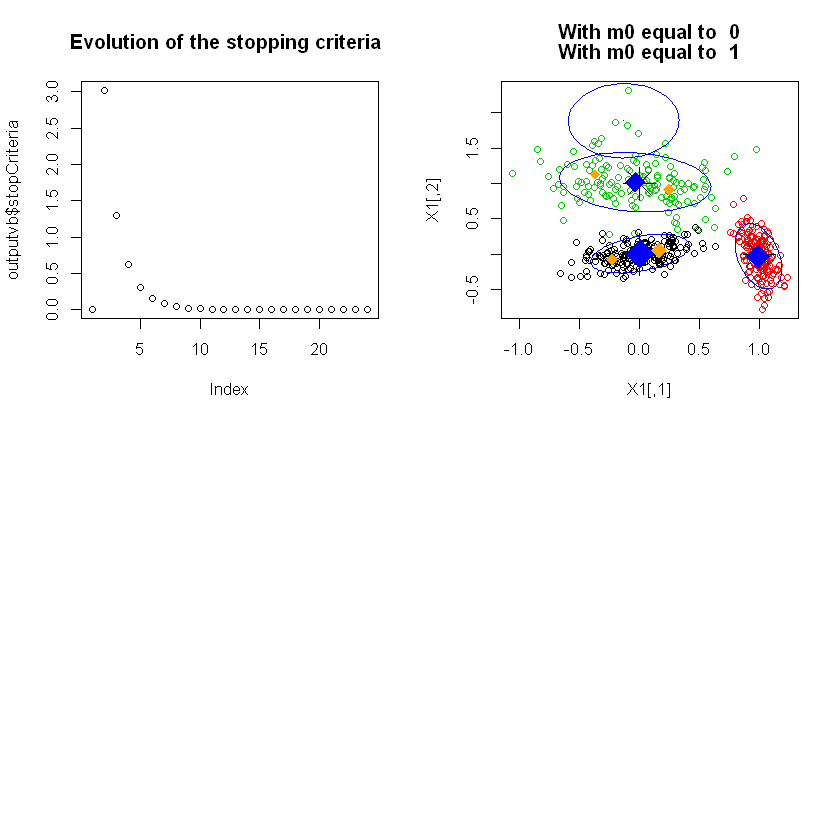

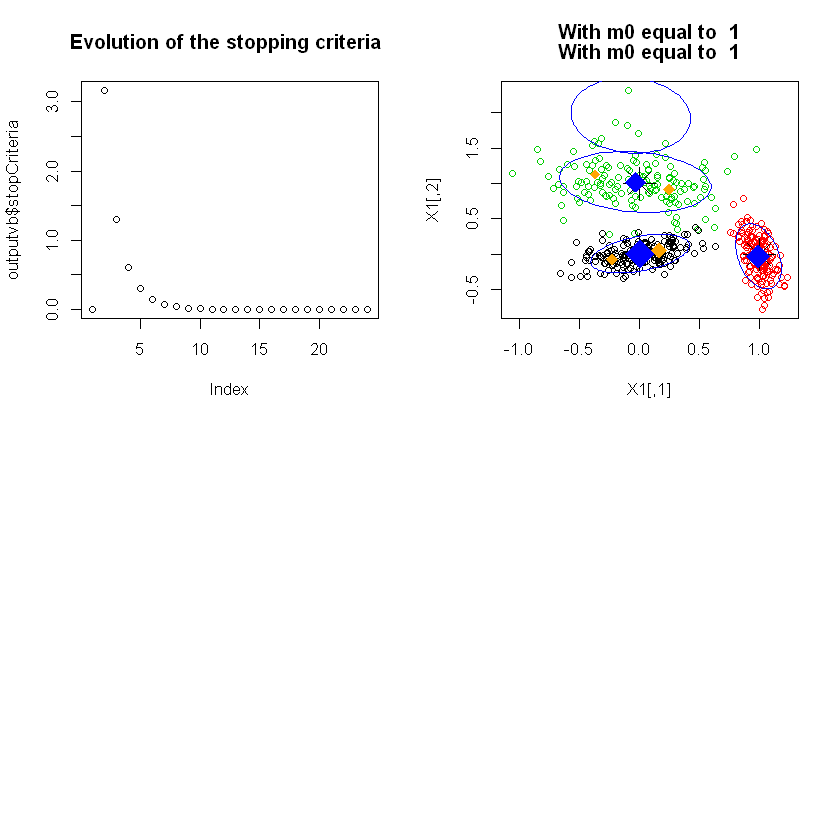

In [13]:
m01 = c(0,0)
m02 = c(0,1)
m03 = c(1,1)
M0 = matrix( 
  c(m01, m02 ,m03), 
    nrow=3,              
    ncol=2,               
    byrow = TRUE)

for (i in (1:nrow(M0))){
par(mfrow = c(2,2))
test_GMM(m0 = M0[i,], ret = 'False', summ = 'True')
outputvb = test_GMM(m0 = M0[i,],Kfit = 5, ret = 'True', summ = 'False')
visual_summary(outputvb, Kfit = 5,cent = 'With m0 equal to ', param = M0[i,])
}



Here we can't really see any influence of the initial parameter m0, all the graphs seem to be the same with different values.

#  3 Metropolis Hasting Algorithm

## Question 1

See functions.R

In [14]:
Kfit = 3

## Question 2

See functions.R

## Question 3

In [15]:
####################################################'
####' Metropolis-Hastings
####################################################'
#' Basic testing for the MH sampler
Kmc <- Kfit ## try with different values
init <- initPar(x = X1, k=Kmc)
alpha0 = 0.01
m0 <- rep(0,2)
beta0 <- 0.1
W0 <- 1*diag(2)
nu0 <- 10
seed <- 10
set.seed(seed)
d = 2
hpar <- list( alpha0= alpha0, 
           m0 = rep(0, d), beta0 = beta0, 
           W0 = W0, nu0 = nu0)

ppar <- list(var_Mu = 0.001,
            nu_Sigma = 500,
            alpha_p = 500) 


set.seed(1)
pct <- proc.time()
outputmh <- MHsample(x = X1, k=Kmc, nsample= 3000,
                    init=init, hpar=hpar, ppar=ppar)
newpct <- proc.time()
elapsed <- newpct - pct
elapsed
print(outputmh$naccept) ## should not be ridiculously low. 

   user  system elapsed 
  15.89    0.00   16.08 

[1] 71


We have proposed 3000 candidates and only $\approx 100$ of them were accepted by the algorithm meaning we have approximately $\frac{100}{3000} = \approx 3.5 \%$ chance to accept a candidate when we have an overall view on all of this.

To generate these 174 candidates accepted it took approximately 10 seconds which is a lot.
In fact 174 candidates is not that much when we want to for example estimate an integral.

## Question 4 

We are going to generate the x by using the data we already have. We will just randomly select one of the data in the dataset we built in the begining.

## Question 5 :

In [16]:
nb_x = 5
indices <- sample(1:nrow(X1),nb_x)
for (i in (1:nb_x)){
cdfTrace_test = cdfTrace(X1[indices[i],], outputmh)
print(heidel.diag(cdfTrace_test, eps=0.1, pvalue=0.05))
print('===================================')
    }


                                   
     Stationarity start     p-value
     test         iteration        
[,1] passed       151       0.793  
                             
     Halfwidth Mean Halfwidth
     test                    
[,1] passed    0.12 0.00463  
[1] "==================================="
                                   
     Stationarity start     p-value
     test         iteration        
[,1] passed       1         0.67   
                              
     Halfwidth Mean  Halfwidth
     test                     
[,1] passed    0.453 0.0123   
[1] "==================================="
                                   
     Stationarity start     p-value
     test         iteration        
[,1] passed       1         0.149  
                              
     Halfwidth Mean  Halfwidth
     test                     
[,1] passed    0.326 0.00579  
[1] "==================================="
                                   
     Stationarity start     p-value
  

The number of iterations necessary to validate the stationary hypothesis is 1 in most cases. It means that with $95 \%$ chance the $X_i$ are all folowing the same law even at the start.

## Question 6 : 

In [17]:
n_sample = 3000

outputmh1 <- MHsample(x = X1, k=Kmc, nsample= n_sample,
                    init=init, hpar=hpar, ppar=ppar)
outputmh2 <- MHsample(x = X1, k=Kmc, nsample= n_sample,
                    init=init, hpar=hpar, ppar=ppar)
outputmh3 <- MHsample(x = X1, k=Kmc, nsample= n_sample,
                    init=init, hpar=hpar, ppar=ppar)

In [18]:
List_start = c(1,50,100,200,500,700,1000)

In [19]:
R_values = rep(0,7)
for (i in (1:length(List_start))){
indice <- sample(1:nrow(X1),1)
cdfTrace_test_1 = mcmc(cdfTrace(X1[indice,], outputmh1,burnin = List_start[i]))
cdfTrace_test_2 = mcmc(cdfTrace(X1[indice,], outputmh2, burnin = List_start[i]))
cdfTrace_test_3 = mcmc(cdfTrace(X1[indice,], outputmh3, burnin = List_start[i]))
cdfTrace_list = list(cdfTrace_test_1,cdfTrace_test_2, cdfTrace_test_3)
print(paste('for a starting value equal to ', List_start[i], 'we get this results'))
print(gelman.diag(cdfTrace_list,confidence  = 0.95))
print("________________________________________")
}

[1] "for a starting value equal to  1 we get this results"
Potential scale reduction factors:

     Point est. Upper C.I.
[1,]       1.35       2.02

[1] "________________________________________"
[1] "for a starting value equal to  50 we get this results"
Potential scale reduction factors:

     Point est. Upper C.I.
[1,]       1.23       1.68

[1] "________________________________________"
[1] "for a starting value equal to  100 we get this results"
Potential scale reduction factors:

     Point est. Upper C.I.
[1,]       1.21       1.59

[1] "________________________________________"
[1] "for a starting value equal to  200 we get this results"
Potential scale reduction factors:

     Point est. Upper C.I.
[1,]       1.19       1.57

[1] "________________________________________"
[1] "for a starting value equal to  500 we get this results"
Potential scale reduction factors:

     Point est. Upper C.I.
[1,]       1.08       1.21

[1] "________________________________________"
[1] "for

Values substantially above 1 indicate lack of convergence. If the chains have not converged, Bayesian credible intervals based on the t-distribution are too wide, and have the potential to shrink by this factor if the MCMC run is continued.


Here we have point est. values that are really close to 1 and confidence interval that are quite small, so it meens the stationary hypothesis is more or less reasonable

## Question 7 : 

In [20]:
n_sample = 1000
outputmh <- MHsample(x = X1, k=Kmc, nsample= n_sample,
                    init=init, hpar=hpar, ppar=ppar)

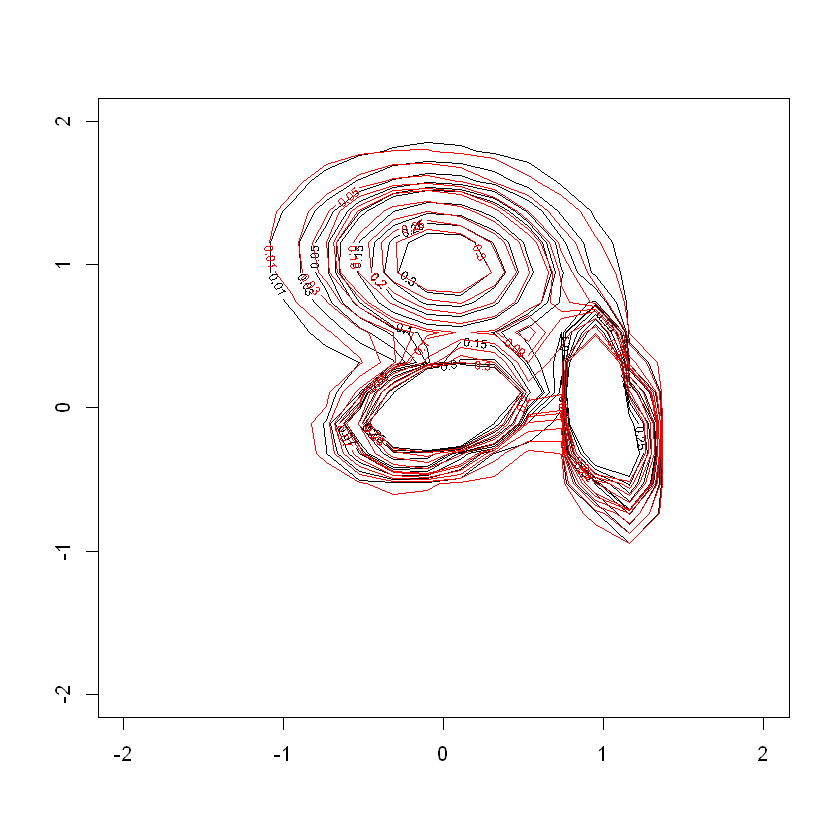

In [21]:
#######################################################
#' Predictive density
#' ####################################################
xx <- seq(-2,2,length.out=20)
yy <- xx
dtrue <- outer(X= xx, Y=yy,
            FUN = function(x,y){
                wrapper(x=x, y=y,
                        FUN=function(u,v){
                          exp(gmllk(x = c(u,v), Mu = Mu,
                          Sigma = sigma, p = p))
                        })
            })

dpredmh <-  outer(X= xx, Y=yy,
            FUN = function(x,y){
                wrapper(x = x, y = y,
                        FUN =function(u,v){
                        x = c(u,v)
                        MHpredictive (x ,outputmh, burnin=500, thin=2)

                     ## complete the code    })
            })})

breaks <- c(seq(0.01,0.09, length.out=5),seq(0.1,0.3,length.out=5))
nbreaks <- length(breaks)
contour(xx,yy, z = dtrue, nlevels=nbreaks, levels = breaks)
contour(xx,yy, z = dpredmh,  nlevels=nbreaks, levels = breaks,
          add=TRUE, col='red')


The red contours corresponding to a different levels are very close to the black ones. 

The true density of the model and the density generated thanks to MCMC are very similar. 

Even though we had the test before to see if we sampled on a stationary distribution now we can say that the distribution on which we sampled was really close to the posterior distribution because for any y $f_{pred}(y) \approx \hat{f}_{MH}(y)$

# 4 Predictive distribution versus maximum likehood distribution

### Question 1

In [22]:
n_sample = 6000
outputmh <- MHsample(x = X1, k=Kmc, nsample= n_sample,
                    init=init, hpar=hpar, ppar=ppar)

In [23]:
alpha_vb = outputvb_main$alphamat[,ncol(outputvb_main$alphamat)]
M_vb = outputvb_main$Marray[,,dim(outputvb_main$Marray)[3]]
p_vb = sapply((1:length(alpha_vb)),function(i){alpha_vb[i]/sum(alpha_vb)})
Mu_vb = M_vb
nu_vb =  outputvb_main$Numat[,ncol(outputvb_main$Numat)]
Winv_vb = outputvb_main$Winvarray[,,,dim(outputvb_main$Winvarray)[4]]
Sigma_vb <- array(dim=c(d,d,Kfit ))
for(j in 1:Kfit){
 
     Sigma_vb[,,j] = Winv_vb[,,j]/nu_vb[j]
}

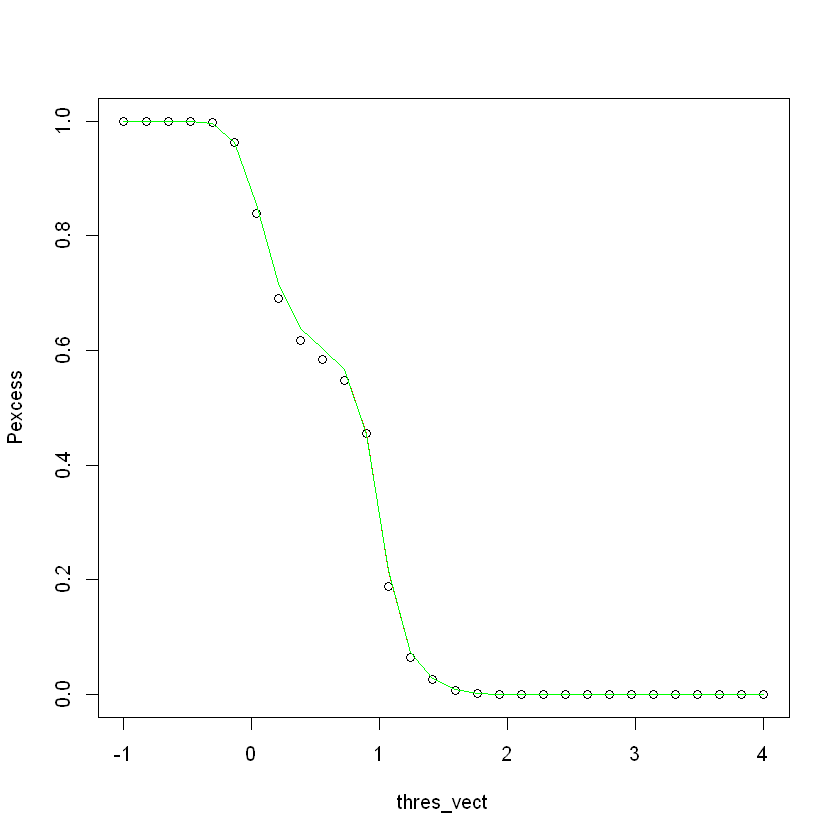

In [24]:
Pexcess <- rep(0,10)
Pexcess_vb <- Pexcess; Pexcess_mh <- Pexcess
thres_vect <- seq(-1, 4, length.out=30)
for(i in seq_along(thres_vect)){
threshold <- rep(thres_vect[i], 2)
Pexcess[i] <- 1 - gmcdf(x = threshold, Mu = Mu, Sigma = sigma, p = p)
Pexcess_vb[i] <-  1 - gmcdf(x = threshold, Mu_vb, Sigma = Sigma_vb, p = p_vb)## complete the code:
## posterior predictive estimator using VB output:
## use vbPredictiveCdf
Pexcess_mh[i] <- 1 - MHpredictiveCdf(x = threshold, outputmh, burnin = 500, thin = 2) ## complete the code:
## posterior predictive estimator using MH output:
## use MHpredictiveCdf.
}
ylim <- range(Pexcess, Pexcess_vb, Pexcess_mh)
plot(thres_vect,Pexcess, ylim = ylim)
lines(thres_vect, Pexcess_vb, col='red')
lines(thres_vect, Pexcess_mh, col='green')

The two curves are really close to each other and also to the real curve. However, the curves are moving away a little bit from the real one on the sides where the curvature is changing and in the center where the slope of the real function is very high.

The two algorithms are working really well and we could even make it more precise by:

- For the MCMC algorithm use more data to have a more precise mean for each $y$. Here, even though the $X_i$ are not following exactly the real distribution but a distribution very close to the real one, when we do the mean by the central limit theorem it converges with a speed of $\frac{1}{\sqrt{M}}$  (in theory if the $X_i$ followed the real distribution) so it gives us an overview of the convergence.


- For the Variational Bayes Algorithm, we are not using a number of iteration but a stopping crieria by comparing the last parameter to the new ones. To have a better approximation of cdf function, an idea is too lower again the stopping criteria.

However increasing M and lowering the stopping criteria will really make the two algorithm slower



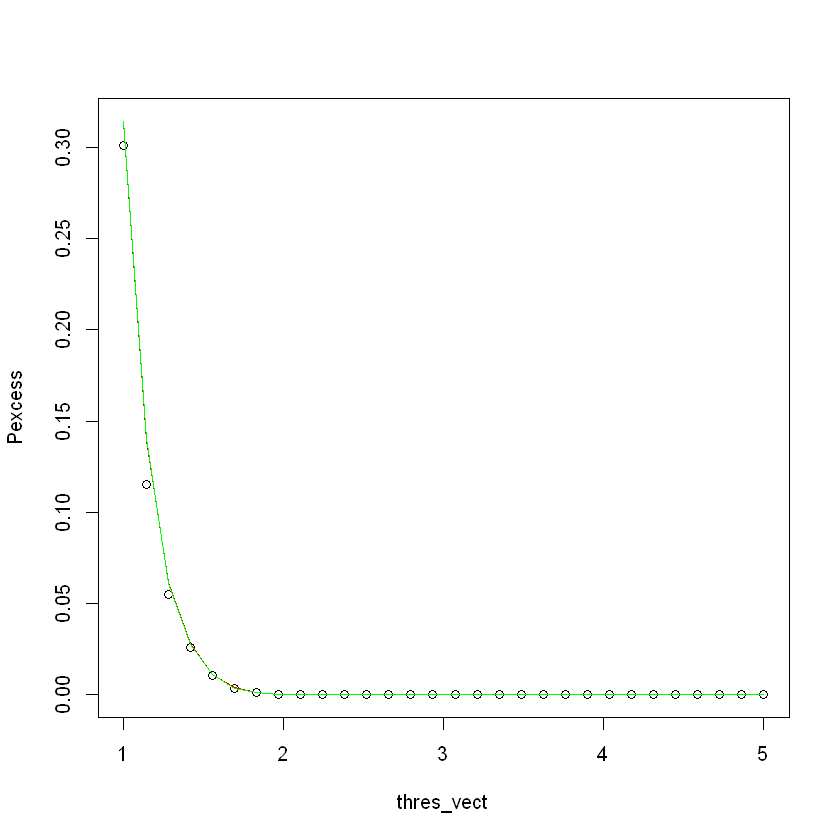

In [25]:
Pexcess <- rep(0,10)
Pexcess_vb <- Pexcess; Pexcess_mh <- Pexcess
thres_vect <- seq(1, 5, length.out=30)
for(i in seq_along(thres_vect)){
threshold <- rep(thres_vect[i], 2)
Pexcess[i] <- 1 - gmcdf(x = threshold, Mu = Mu, Sigma = sigma, p = p)
Pexcess_vb[i] <-  1 - gmcdf(x = threshold, Mu_vb, Sigma = Sigma_vb, p = p_vb)## complete the code:
## posterior predictive estimator using VB output:
## use vbPredictiveCdf
Pexcess_mh[i] <- 1 - MHpredictiveCdf(x = threshold, outputmh, burnin = 500, thin = 2) ## complete the code:
## posterior predictive estimator using MH output:
## use MHpredictiveCdf.
}
ylim <- range(Pexcess, Pexcess_vb, Pexcess_mh)
plot(thres_vect,Pexcess, ylim = ylim)
lines(thres_vect, Pexcess_vb, col='red')
lines(thres_vect, Pexcess_mh, col='green')

When we look at the tail,  

- The function varies not a lot and we have a lot of points. when x > 2  we can't notice the difference between the red and the green curve but also the real one. They are all very close to each other.

- However, when the curvature is higher between 1.75 and 2 we can see that both curves are moving away from the real one.


### Question 4

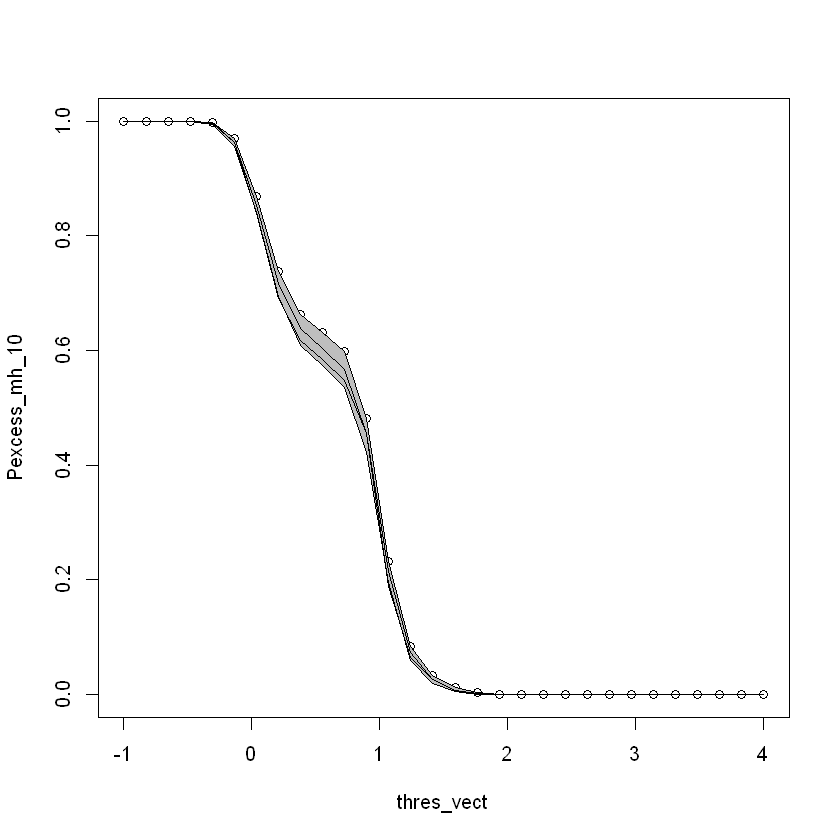

In [26]:
Pexcess <- rep(0,10)
Pexcess_mh <- Pexcess
Pexcess_mh_10 <- Pexcess
Pexcess_mh_90 <- Pexcess
thres_vect <- seq(-1, 4, length.out=30)
for(i in seq_along(thres_vect)){
threshold <- rep(thres_vect[i], 2)
Pexcess[i] <- 1 - gmcdf(x = threshold, Mu = Mu, Sigma = sigma, p = p)
u = MHpredictiveCdf_quantiles(x = threshold, outputmh, burnin = 1000, thin = 2)
Pexcess_mh[i] <- 1 - u[1] ## complete the code:
Pexcess_mh_10[i] <- 1 - u[2]
Pexcess_mh_90[i] <- 1 - u[3]

## posterior predictive estimator using MH output:
## use MHpredictiveCdf.
}
ylim <- range(Pexcess, Pexcess_mh, Pexcess_mh_10, Pexcess_mh_90)
plot(thres_vect, Pexcess_mh_10, col='black')
lines(thres_vect, Pexcess_mh_90, col='black')
polygon(c(thres_vect,rev(thres_vect)),c(Pexcess_mh_90,rev(Pexcess_mh_10)),col="grey")
lines(thres_vect,Pexcess, ylim = ylim, col = 'black')
lines(thres_vect, Pexcess_mh, col='black')



**The area in grey correspond to the experimental quantile interval at 90%.**

- We can see that the width of the interval is bigger in the center and the more you get away from the center the more tightened the interval gets. It's basically due to the fact that the slope in this area is very high in abs so a little change in the input has a lot of impact on the output.


- When the slope get's less high in the side of the interval, we can see that the interval is really tight until it's basically reduced to a point in the extreme sides.